# Time series Stock price using FB Prophet

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pdr.get_data_yahoo('ICICIBANK.NS')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540
2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354
2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267
2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601
2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038

<Axes: xlabel='Date'>

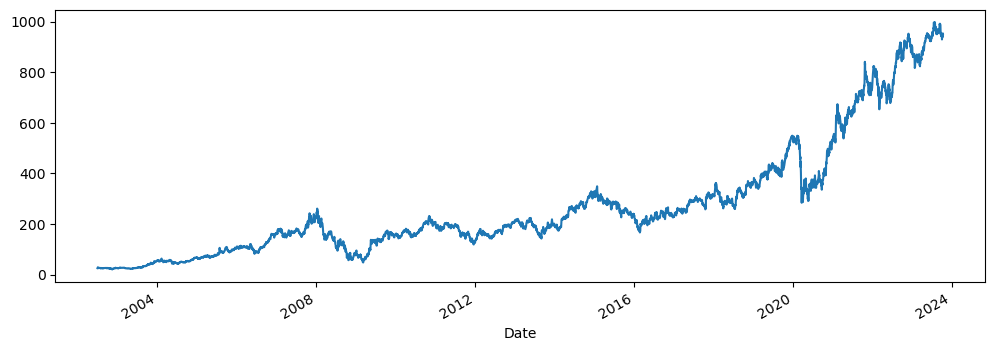

In [4]:
df['Close'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

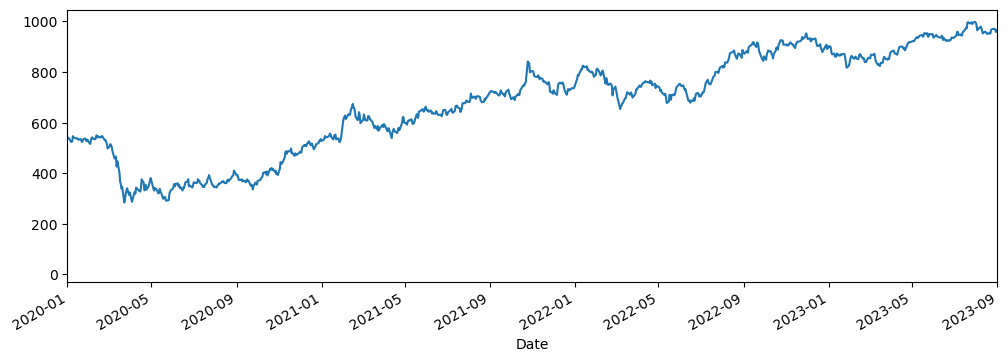

In [5]:
## xlimit and y limit  #,ylim=[0,900]
df['Close'].plot(xlim=['2020-01-01','2023-09-01'],figsize=(12,4))

<Axes: xlabel='Date'>

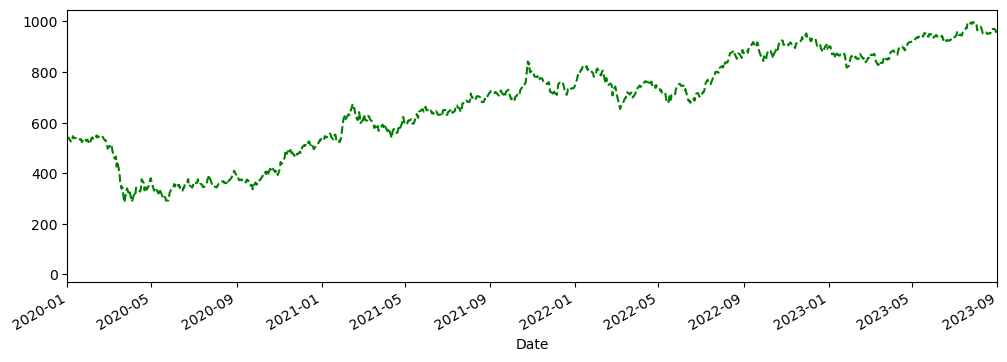

In [6]:
## xlimit and y limit and coloring
df['Close'].plot(xlim=['2020-01-01','2023-09-01'],figsize=(12,4),ls='--',c='green')

In [7]:
df.index

DatetimeIndex(['2002-07-01', '2002-07-02', '2002-07-03', '2002-07-04',
               '2002-07-05', '2002-07-08', '2002-07-09', '2002-07-10',
               '2002-07-11', '2002-07-12',
               ...
               '2023-09-29', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13'],
              dtype='datetime64[ns]', name='Date', length=5289, freq=None)

In [8]:
index=df.loc['2002-07-01':'2023-06-30'].index
share_close=df.loc['2002-07-01':'2023-06-30']['Close']

In [9]:
share_close

Date
2002-07-01     25.127272
2002-07-02     26.745455
2002-07-03     28.090908
2002-07-04     27.390909
2002-07-05     27.672728
                 ...    
2023-06-23    923.500000
2023-06-26    927.450012
2023-06-27    936.099976
2023-06-28    936.099976
2023-06-30    934.599976
Name: Close, Length: 5217, dtype: float64

In [10]:
index

DatetimeIndex(['2002-07-01', '2002-07-02', '2002-07-03', '2002-07-04',
               '2002-07-05', '2002-07-08', '2002-07-09', '2002-07-10',
               '2002-07-11', '2002-07-12',
               ...
               '2023-06-16', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=5217, freq=None)

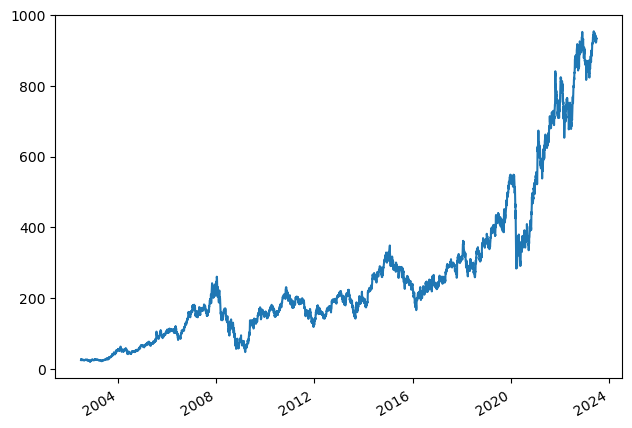

In [11]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_close)

In [12]:
df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540
2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354
2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267
2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601
2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038

In [13]:
df=df.reset_index()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5289 non-null   datetime64[ns]
 1   Open       5289 non-null   float64       
 2   High       5289 non-null   float64       
 3   Low        5289 non-null   float64       
 4   Close      5289 non-null   float64       
 5   Adj Close  5289 non-null   float64       
 6   Volume     5289 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 289.4 KB


In [15]:
df=df.set_index('Date',drop=True)

In [16]:
df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540
2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354
2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267
2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601
2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038

## Time resampling
* Rule A -year end frequency
* Rule qs quarter end frequency

*// check the rules//*

In [17]:
df.resample(rule='A').min()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-12-31   20.272726   21.454544   19.890909   20.100000   14.308322   
2003-12-31   21.945454   22.027271   21.645454   21.963636   15.634963   
2004-12-31   38.463634   43.536362   38.463634   41.890907   31.262316   
2005-12-31   61.636364   63.036362   59.127274   61.363636   47.098354   
2006-12-31   84.372726   84.709091   79.090912   82.036362   64.006210   
2007-12-31  146.118179  148.109085  143.818176  146.172729  116.019257   
2008-12-31   54.772728   59.054546   51.472729   56.945454   46.521503   
2009-12-31   47.945454   49.527271   45.872726   47.809093   39.057568   
2010-12-31  129.454544  146.872726  129.454544  143.145447  118.688599   
2011-12-31  120.363632  122.000000  116.545456  118.800003  101.264359   
2012-12-31  125.481819  127.181816  124.563637  126.645454  107.951759   
2013-12-31  142.472733  147.027267  137.618179  142.463638  126.011749   
2014-12-31  172.699997  175.963638  171.563629  174.190903  154.075119   
2015-12-31  224.772720  225.363632  220.954544  224.000000  208.025101   
2016-12-31  167.545456  169.045456  164.318176  166.363632  154.499161   
2017-12-31  229.181824  232.181824  225.545456  228.272720  216.355988   
2018-12-31  260.250000  264.350006  256.500000  259.250000  247.647263   
2019-12-31  339.100006  343.000000  336.149994  338.750000  328.668945   
2020-12-31  284.000000  297.899994  268.299988  284.000000  276.894440   
2021-12-31  514.599976  529.849976  512.000000  522.349976  509.280945   
2022-12-31  643.299988  667.000000  642.150024  653.750000  639.259766   
2023-12-31  800.000000  826.250000  796.000000  817.200012  803.882263   

             Volume  
Date                 
2002-12-31        0  
2003-12-31        0  
2004-12-31        0  
2005-12-31        0  
2006-12-31  1416112  
2007-12-31  1900998  
2008-12-31        0  
2009-12-31        0  
2010-12-31  8007180  
2011-12-31  7449898  
2012-12-31  5533500  
2013-12-31  4356632  
2014-12-31        0  
2015-12-31  2583280  
2016-12-31  5998096  
2017-12-31  1114874  
2018-12-31  2074764  
2019-12-31  6305407  
2020-12-31  3636073  
2021-12-31  3149310  
2022-12-31  4390050  
2023-12-31        0

In [18]:
df.resample(rule='A').max()

Open         High         Low       Close   Adj Close  \
Date                                                                       
2002-12-31    28.181818    28.799999   27.172728   28.090908   19.996708   
2003-12-31    56.363636    56.363636   53.454544   54.945454   41.004650   
2004-12-31    69.054543    69.054543   67.472725   68.000000   52.191956   
2005-12-31   109.890907   111.809090  107.363632  109.400002   85.355812   
2006-12-31   164.218185   168.181824  162.909088  164.218185  130.342148   
2007-12-31   241.790909   245.272720  230.909088  242.436356  194.553696   
2008-12-31   263.636353   264.636353  251.027267  260.909088  209.377945   
2009-12-31   172.500000   176.327271  170.918182  174.381821  144.588165   
2010-12-31   231.454544   232.363632  227.027267  230.754547  194.154984   
2011-12-31   209.818176   210.618179  207.081818  208.154541  175.139511   
2012-12-31   210.018188   210.663635  206.218185  208.899994  181.734131   
2013-12-31   223.636368   225.163635  221.800003  223.990906  194.862610   
2014-12-31   330.727264   332.772736  325.818176  329.272736  300.620422   
2015-12-31   348.136353   357.636353  346.909088  349.136353  318.755585   
2016-12-31   262.909088   271.272736  260.636353  266.000000  252.113739   
2017-12-31   324.000000   332.350006  323.799988  325.100006  310.550171   
2018-12-31   370.100006   375.299988  365.549988  370.000000  358.989014   
2019-12-31   549.599976   552.200012  542.599976  549.400024  535.654236   
2020-12-31   549.000000   550.700012  542.700012  549.299988  535.556702   
2021-12-31   830.099976   867.000000  824.200012  841.700012  823.043884   
2022-12-31   956.000000   958.200012  941.000000  952.900024  937.370728   
2023-12-31  1004.950012  1008.700012  990.450012  998.299988  992.450012   

               Volume  
Date                   
2002-12-31   14070727  
2003-12-31   76284219  
2004-12-31   83568947  
2005-12-31   44472626  
2006-12-31   56324939  
2007-12-31   37261845  
2008-12-31  196556492  
2009-12-31  277252228  
2010-12-31   67251569  
2011-12-31  175381222  
2012-12-31  123255759  
2013-12-31   81385683  
2014-12-31   64509505  
2015-12-31   38967790  
2016-12-31   71191415  
2017-12-31  128437479  
2018-12-31   87176185  
2019-12-31  286857658  
2020-12-31  125939354  
2021-12-31   96124084  
2022-12-31   35959638  
2023-12-31   41383839

<Axes: xlabel='Date'>

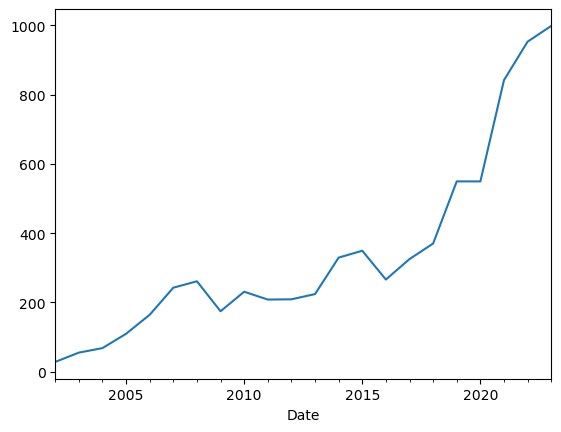

In [19]:
df.resample(rule='A').max()['Close'].plot()

<Axes: xlabel='Date'>

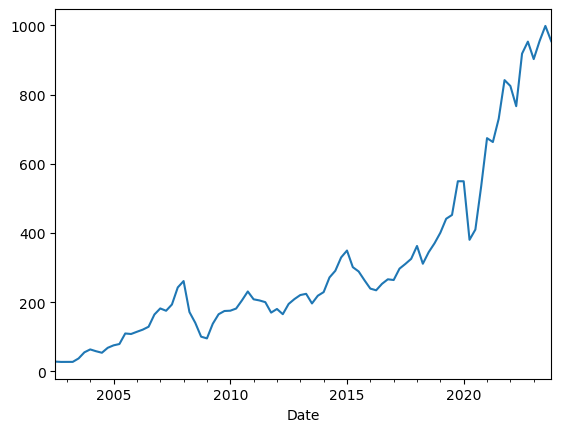

In [20]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='QS').max()['Close'].plot()

In [21]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='BA').max()

Open         High         Low       Close   Adj Close  \
Date                                                                       
2002-12-31    28.181818    28.799999   27.172728   28.090908   19.996708   
2003-12-31    56.363636    56.363636   53.454544   54.945454   41.004650   
2004-12-31    69.054543    69.054543   67.472725   68.000000   52.191956   
2005-12-30   109.890907   111.809090  107.363632  109.400002   85.355812   
2006-12-29   164.218185   168.181824  162.909088  164.218185  130.342148   
2007-12-31   241.790909   245.272720  230.909088  242.436356  194.553696   
2008-12-31   263.636353   264.636353  251.027267  260.909088  209.377945   
2009-12-31   172.500000   176.327271  170.918182  174.381821  144.588165   
2010-12-31   231.454544   232.363632  227.027267  230.754547  194.154984   
2011-12-30   209.818176   210.618179  207.081818  208.154541  175.139511   
2012-12-31   210.018188   210.663635  206.218185  208.899994  181.734131   
2013-12-31   223.636368   225.163635  221.800003  223.990906  194.862610   
2014-12-31   330.727264   332.772736  325.818176  329.272736  300.620422   
2015-12-31   348.136353   357.636353  346.909088  349.136353  318.755585   
2016-12-30   262.909088   271.272736  260.636353  266.000000  252.113739   
2017-12-29   324.000000   332.350006  323.799988  325.100006  310.550171   
2018-12-31   370.100006   375.299988  365.549988  370.000000  358.989014   
2019-12-31   549.599976   552.200012  542.599976  549.400024  535.654236   
2020-12-31   549.000000   550.700012  542.700012  549.299988  535.556702   
2021-12-31   830.099976   867.000000  824.200012  841.700012  823.043884   
2022-12-30   956.000000   958.200012  941.000000  952.900024  937.370728   
2023-12-29  1004.950012  1008.700012  990.450012  998.299988  992.450012   

               Volume  
Date                   
2002-12-31   14070727  
2003-12-31   76284219  
2004-12-31   83568947  
2005-12-30   44472626  
2006-12-29   56324939  
2007-12-31   37261845  
2008-12-31  196556492  
2009-12-31  277252228  
2010-12-31   67251569  
2011-12-30  175381222  
2012-12-31  123255759  
2013-12-31   81385683  
2014-12-31   64509505  
2015-12-31   38967790  
2016-12-30   71191415  
2017-12-29  128437479  
2018-12-31   87176185  
2019-12-31  286857658  
2020-12-31  125939354  
2021-12-31   96124084  
2022-12-30   35959638  
2023-12-29   41383839

In [22]:
df.resample(rule='BQS').max()

Open         High         Low       Close   Adj Close  \
Date                                                                       
2002-07-01    28.181818    28.799999   27.172728   28.090908   19.996708   
2002-10-01    27.636362    27.900000   26.654545   27.181818   19.349562   
2003-01-01    27.718182    28.354546   27.090908   27.263636   19.407806   
2003-04-01    26.409090    27.736362   26.409090   27.299999   19.433691   
2003-07-01    37.227272    37.809090   36.727272   37.181816   27.748030   
...                 ...          ...         ...         ...         ...   
2022-10-03   956.000000   958.200012  941.000000  952.900024  937.370728   
2023-01-02   900.900024   907.900024  896.750000  902.450012  887.742920   
2023-04-03   954.250000   958.849976  946.799988  954.299988  938.747864   
2023-07-03  1004.950012  1008.700012  990.450012  998.299988  992.450012   
2023-10-02   954.900024   962.049988  950.750000  954.250000  954.250000   

              Volume  
Date                  
2002-07-01  13899418  
2002-10-01  14070727  
2003-01-01  10383917  
2003-04-01  17082367  
2003-07-01  76284219  
...              ...  
2022-10-03  20858573  
2023-01-02  39718683  
2023-04-03  41383839  
2023-07-03  36675400  
2023-10-02  17334739  

[86 rows x 6 columns]

<Axes: xlabel='Date'>

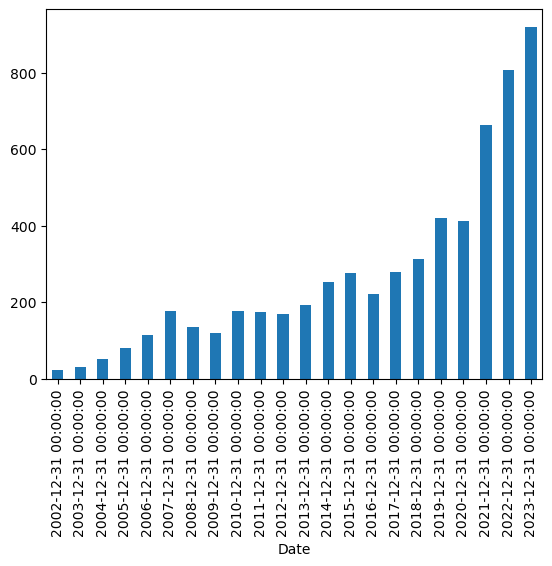

In [23]:
##plotting
df['Close'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

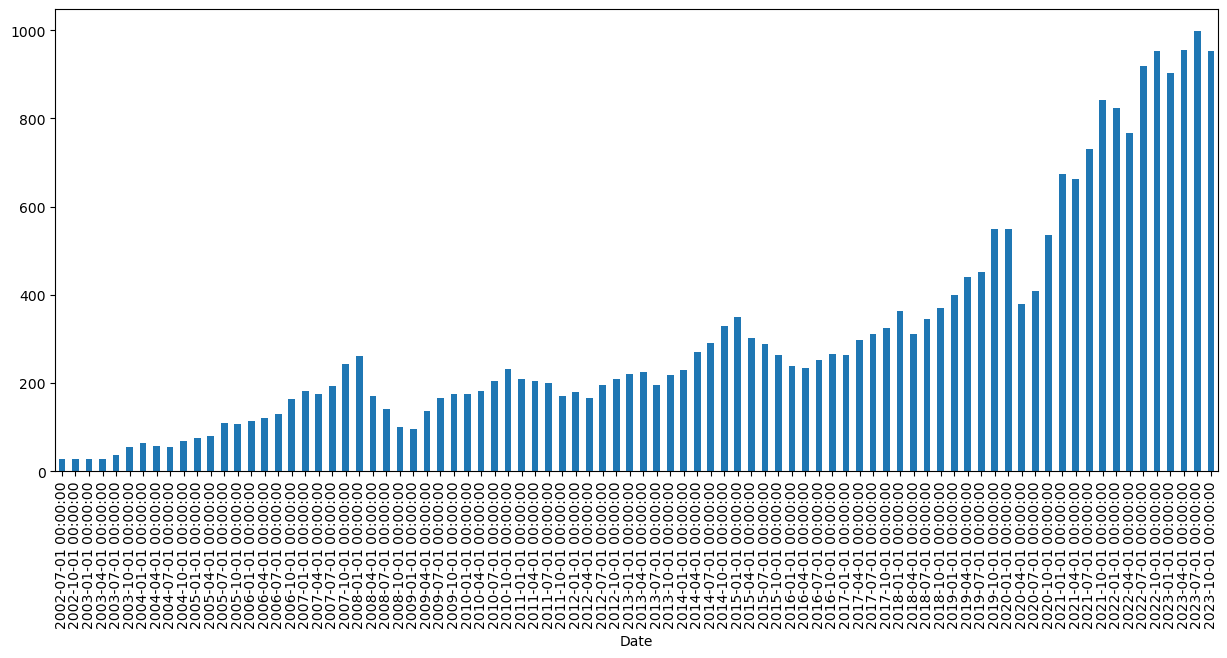

In [24]:
df['Close'].resample(rule='QS').max().plot(kind='bar',figsize=(15,6))

In [25]:
df['Close'].rolling(11).max().head(20)

Date
2002-07-01          NaN
2002-07-02          NaN
2002-07-03          NaN
2002-07-04          NaN
2002-07-05          NaN
2002-07-08          NaN
2002-07-09          NaN
2002-07-10          NaN
2002-07-11          NaN
2002-07-12          NaN
2002-07-15    28.090908
2002-07-16    28.090908
2002-07-17    28.090908
2002-07-18    27.672728
2002-07-19    27.672728
2002-07-22    27.245455
2002-07-23    27.090908
2002-07-24    26.990910
2002-07-25    26.790909
2002-07-26    26.790909
Name: Close, dtype: float64

In [26]:
df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540
2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354
2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267
2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601
2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038

In [27]:
df['Close:30 days rolling']=df['Close'].rolling(30).mean() #min_period=1

In [28]:
df.head(32)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540   
2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354   
2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267   
2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601   
2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038   
2002-07-08  27.881819  27.890909  27.172728  27.245455  19.394861  2092667   
2002-07-09  27.400000  27.681818  26.927273  27.090908  19.284847  1026800   
2002-07-10  27.236362  27.272726  26.909090  26.990910  19.213663  1513611   
2002-07-11  27.081818  27.081818  26.545454  26.790909  19.071293  1454750   
2002-07-12  27.272726  27.409090  26.672728  26.790909  19.071293   475040   
2002-07-15  26.890909  26.909090  26.181818  26.372726  18.773607   535634   
2002-07-16  26.181818  26.363636  25.900000  26.145454  18.611822  1400542   
2002-07-17  26.181818  26.490910  26.000000  26.327272  18.741249  1242741   
2002-07-18  26.381819  26.536364  26.181818  26.354546  18.760666  1076009   
2002-07-19  26.000000  27.272726  25.454544  26.463636  18.838316  4412276   
2002-07-22  26.181818  26.363636  25.654545  26.272726  18.702419  1842252   
2002-07-23  26.345453  26.509090  26.109091  26.400000  18.793018  2576926   
2002-07-24  26.018181  26.227272  25.572727  25.745455  18.327082  1909121   
2002-07-25  26.363636  26.690908  25.218182  25.409090  18.087635  2055350   
2002-07-26  24.909090  25.136362  24.600000  24.963636  17.770536  1349804   
2002-07-29  25.181818  26.181818  24.545454  25.781818  18.352957  1999052   
2002-07-30  26.527271  26.527271  24.545454  25.081818  17.854664  3601317   
2002-07-31  24.818180  25.818180  24.418180  25.563637  18.197653  1734975   
2002-08-01  25.799999  26.518181  25.590908  26.318180  18.734774  2501174   
2002-08-02  26.363636  26.363636  23.654545  25.572727  18.204119   987239   
2002-08-05  25.454544  25.636362  24.690908  24.927273  17.744652  1550274   
2002-08-06  24.900000  25.018181  24.536364  24.790909  17.647579  1488140   
2002-08-07  25.090908  25.363636  24.645454  24.872726  17.705822  1053602   
2002-08-08  24.927273  25.000000  24.572727  24.681818  17.569921   881501   
2002-08-09  24.636362  24.727272  24.481817  24.663635  17.556978  1368873   
2002-08-12  24.545454  24.890909  24.227272  24.427273  17.388723   467516   
2002-08-13  24.545454  24.727272  24.000000  24.418180  17.382244   710748   

            Close:30 days rolling  
Date                               
2002-07-01                    NaN  
2002-07-02                    NaN  
2002-07-03                    NaN  
2002-07-04                    NaN  
2002-07-05                    NaN  
2002-07-08                    NaN  
2002-07-09                    NaN  
2002-07-10                    NaN  
2002-07-11                    NaN  
2002-07-12                    NaN  
2002-07-15                    NaN  
2002-07-16                    NaN  
2002-07-17                    NaN  
2002-07-18                    NaN  
2002-07-19                    NaN  
2002-07-22                    NaN  
2002-07-23                    NaN  
2002-07-24                    NaN  
2002-07-25                    NaN  
2002-07-26                    NaN  
2002-07-29                    NaN  
2002-07-30                    NaN  
2002-07-31                    NaN  
2002-08-01                    NaN  
2002-08-02                    NaN  
2002-08-05                    NaN  
2002-08-06                    NaN  
2002-08-07                    NaN  
2002-08-08                    NaN  
2002-08-09              26.088181  
2002-08-12              26.064848  
2002-08-13              25.987272

<Axes: xlabel='Date'>

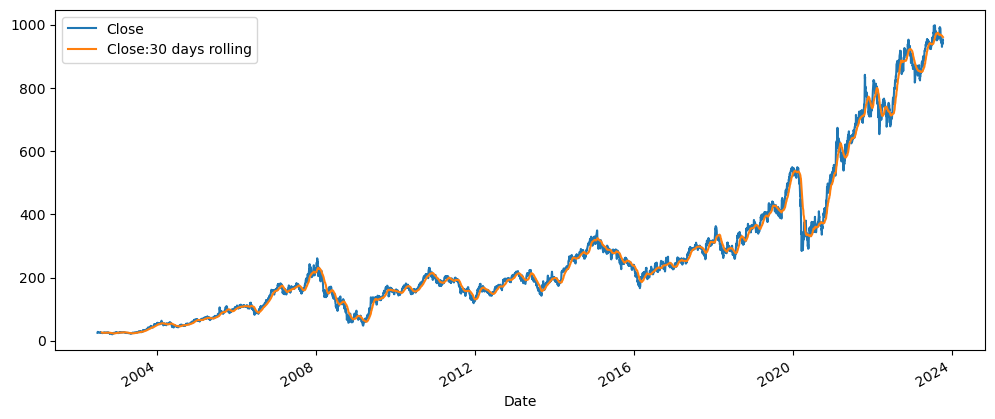

In [29]:
df[['Close','Close:30 days rolling']].plot(figsize=(12,5))

In [30]:
df['Close:10 days rolling']=df['Close'].rolling(10).mean()
df['Close:50 days rolling']=df['Close'].rolling(50).mean()

<Axes: xlabel='Date'>

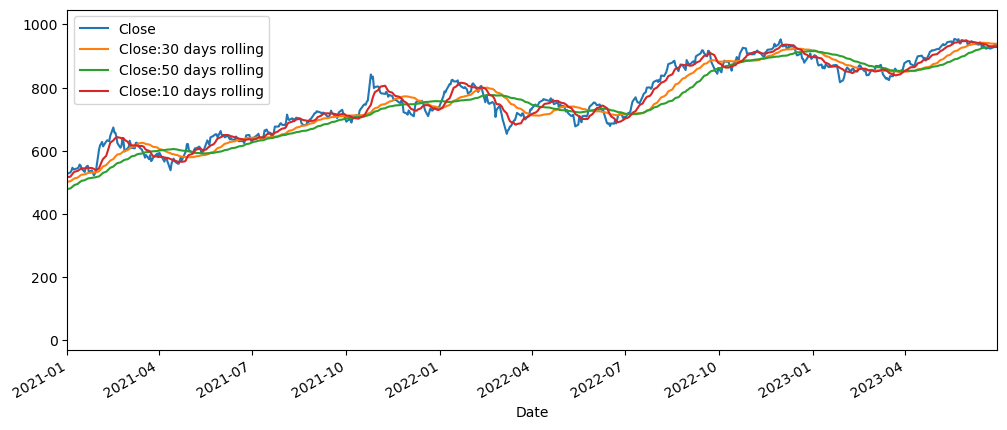

In [31]:
df[['Close','Close:30 days rolling','Close:50 days rolling','Close:10 days rolling']].plot(xlim=['2021-01-01','2023-06-30'],figsize=(12,5))

<Axes: xlabel='Date'>

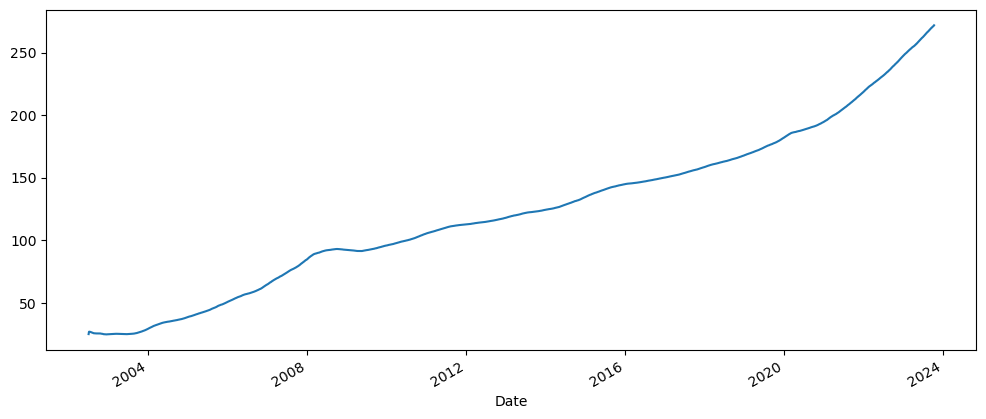

In [32]:
#Expand 
#Cumilative moving average

df['Close'].expanding().mean().plot(figsize=(12,5))

In [33]:
df['cum_moving_avg']=df['Close'].expanding().mean()

<Axes: xlabel='Date'>

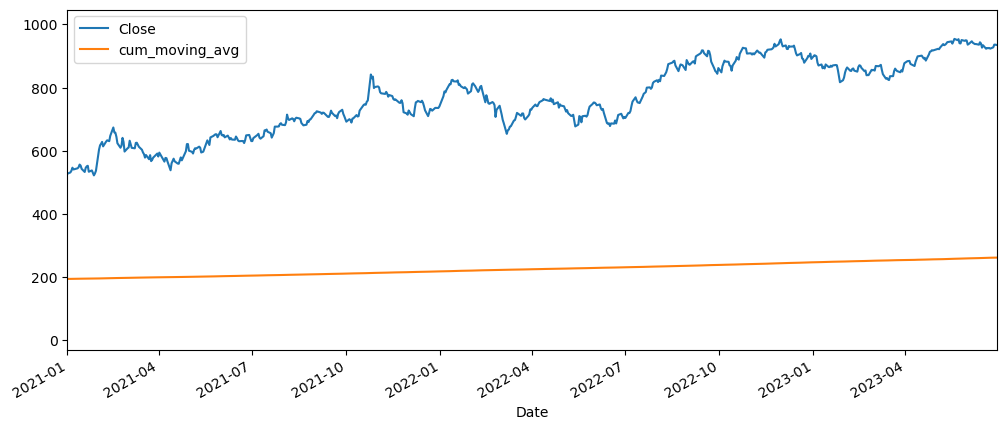

In [34]:
df[['Close','cum_moving_avg']].plot(xlim=['2021-01-01','2023-06-30'],figsize=(12,5))

In [35]:
# EMA -- Smoothing factor - 0.1
df['ema_0.1']=df['Close'].ewm(alpha=0.1,adjust=False).mean()
df['ema_0.3']=df['Close'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

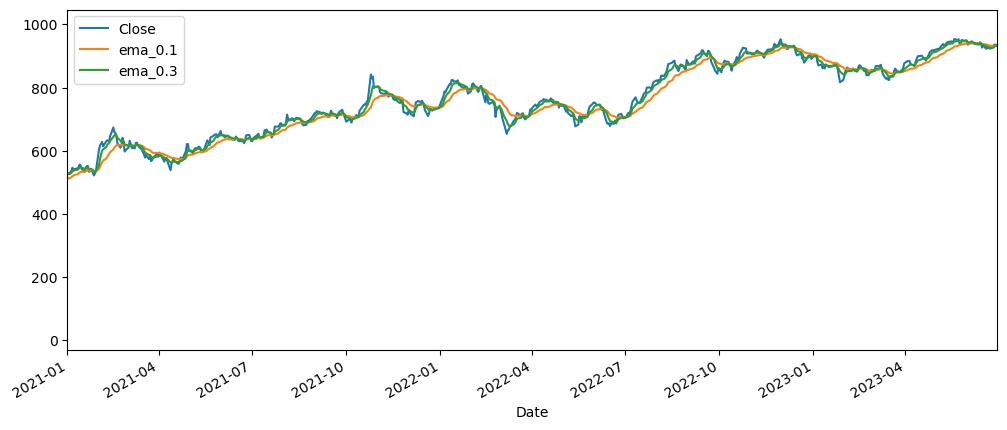

In [36]:
df[['Close','ema_0.1','ema_0.3']].plot(xlim=['2021-01-01','2023-06-30'],figsize=(12,5))

In [37]:
# EMA -- span for weighted avg - mulitiplier=2/(span+1) 
df['ema_w']=df['Close'].ewm(span=5).mean()

<Axes: xlabel='Date'>

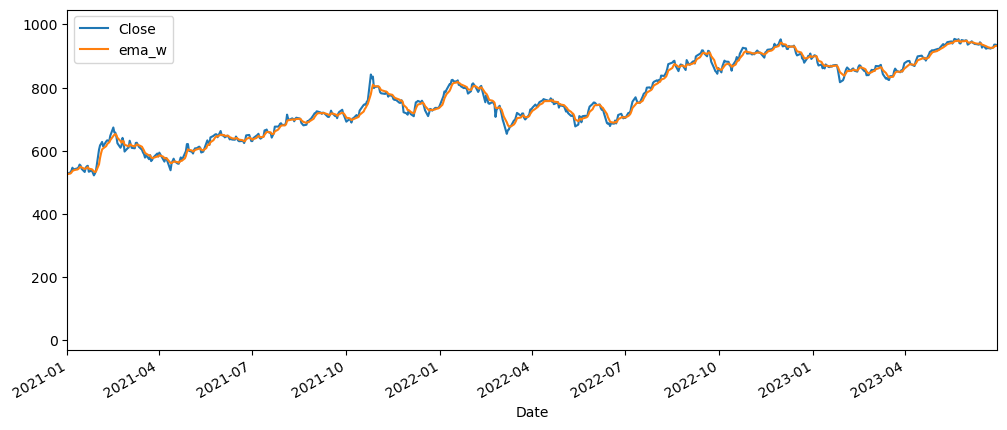

In [38]:
df[['Close','ema_w']].plot(xlim=['2021-01-01','2023-06-30'],figsize=(12,5))

# Fitting FB Prophet model

In [39]:
df.reset_index(inplace=True)

In [40]:
df.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2002-07-01  25.418180  25.818180  24.818180  25.127272  17.887018  2047540   
1 2002-07-02  25.454544  27.636362  25.236362  26.745455  19.038933  5546354   
2 2002-07-03  26.727272  28.181818  26.645454  28.090908  19.996708  5745267   
3 2002-07-04  28.181818  28.799999  27.036364  27.390909  19.498405  3896601   
4 2002-07-05  27.090908  27.863636  26.945454  27.672728  19.699018  3261038   

   Close:30 days rolling  Close:10 days rolling  Close:50 days rolling  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   cum_moving_avg    ema_0.1    ema_0.3      ema_w  
0       25.127272  25.127272  25.127272  25.127272  
1       25.936363  25.289090  25.612727  26.098182  
2       26.654545  25.569272  26.356181  27.042105  
3       26.838636  25.751436  26.666599  27.186993  
4       27.005454  25.943565  26.968438  27.373460

In [41]:
df=df[['Date','Close']]

In [42]:
df.head()

Date      Close
0 2002-07-01  25.127272
1 2002-07-02  26.745455
2 2002-07-03  28.090908
3 2002-07-04  27.390909
4 2002-07-05  27.672728

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5289 non-null   datetime64[ns]
 1   Close   5289 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.8 KB


In [44]:
df_m=df[df['Date']<='2023-06-30']

In [45]:
df_m.shape

(5217, 2)

In [46]:
df_m.columns=['ds','y']

In [47]:
df_m.head()

ds          y
0 2002-07-01  25.127272
1 2002-07-02  26.745455
2 2002-07-03  28.090908
3 2002-07-04  27.390909
4 2002-07-05  27.672728

In [48]:
model=Prophet()
model.fit(df_m)

23:23:53 - cmdstanpy - INFO - Chain [1] start processing
23:23:56 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [50]:
# create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [51]:
future_dates.tail(10)

ds
5572 2024-06-20
5573 2024-06-21
5574 2024-06-22
5575 2024-06-23
5576 2024-06-24
5577 2024-06-25
5578 2024-06-26
5579 2024-06-27
5580 2024-06-28
5581 2024-06-29

In [52]:
prediction=model.predict(future_dates)

In [53]:
prediction.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2002-07-01   9.854865  -47.537675   50.372271     9.854865     9.854865   
1 2002-07-02   9.907740  -42.698443   53.305248     9.907740     9.907740   
2 2002-07-03   9.960616  -48.097052   56.573386     9.960616     9.960616   
3 2002-07-04  10.013491  -44.595514   53.158637    10.013491    10.013491   
4 2002-07-05  10.066366  -46.296876   53.273415    10.066366    10.066366   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -6.578443             -6.578443             -6.578443  4.508924   
1       -5.887328             -5.887328             -5.887328  4.983905   
2       -6.321409             -6.321409             -6.321409  4.319853   
3       -5.419596             -5.419596             -5.419596  4.982143   
4       -5.835091             -5.835091             -5.835091  4.321547   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0      4.508924      4.508924 -11.087367    -11.087367    -11.087367   
1      4.983905      4.983905 -10.871233    -10.871233    -10.871233   
2      4.319853      4.319853 -10.641263    -10.641263    -10.641263   
3      4.982143      4.982143 -10.401739    -10.401739    -10.401739   
4      4.321547      4.321547 -10.156638    -10.156638    -10.156638   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  3.276422  
1                         0.0  4.020413  
2                         0.0  3.639206  
3                         0.0  4.593894  
4                         0.0  4.231275

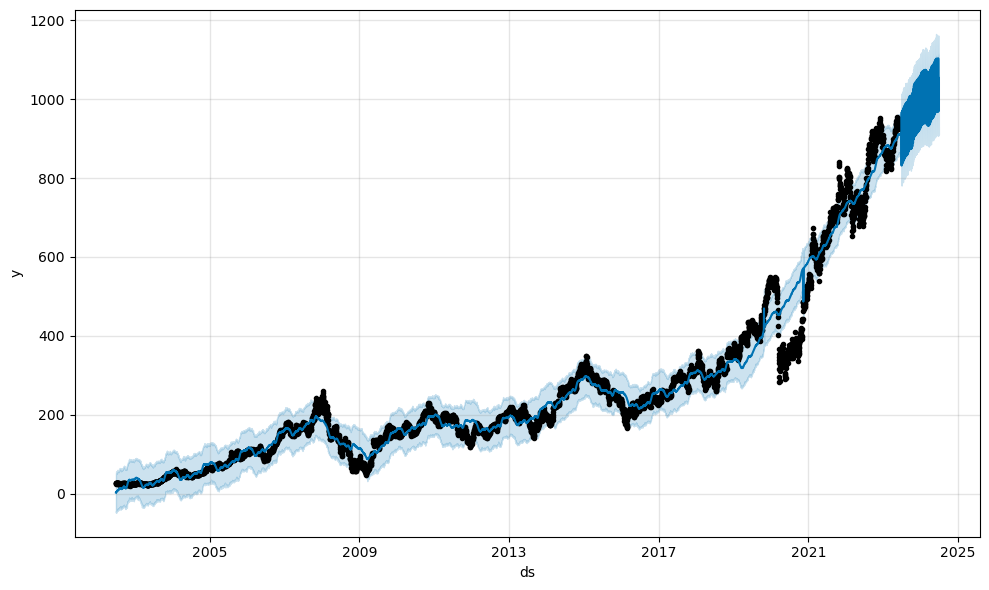

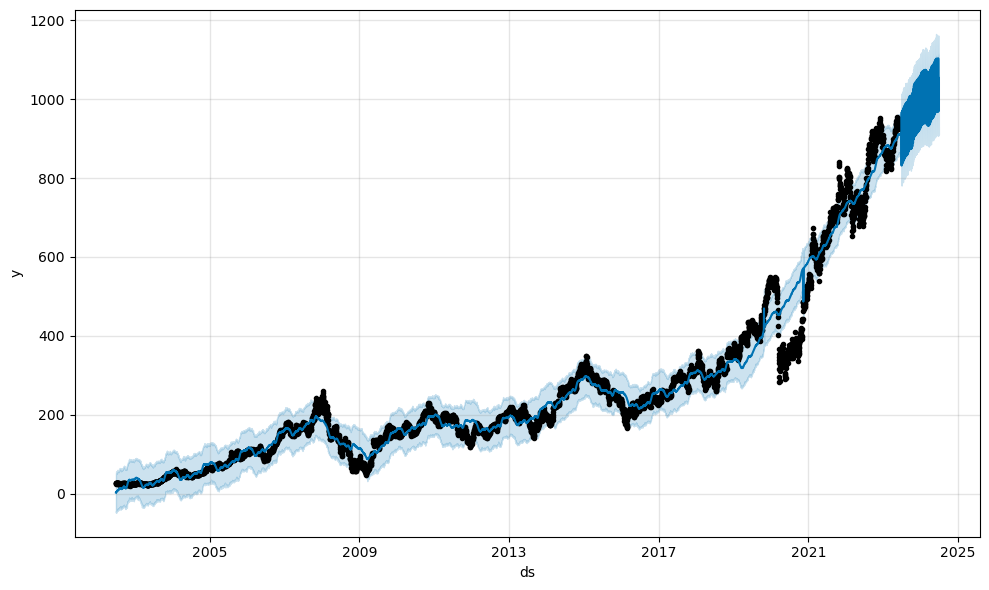

In [54]:
model.plot(prediction)

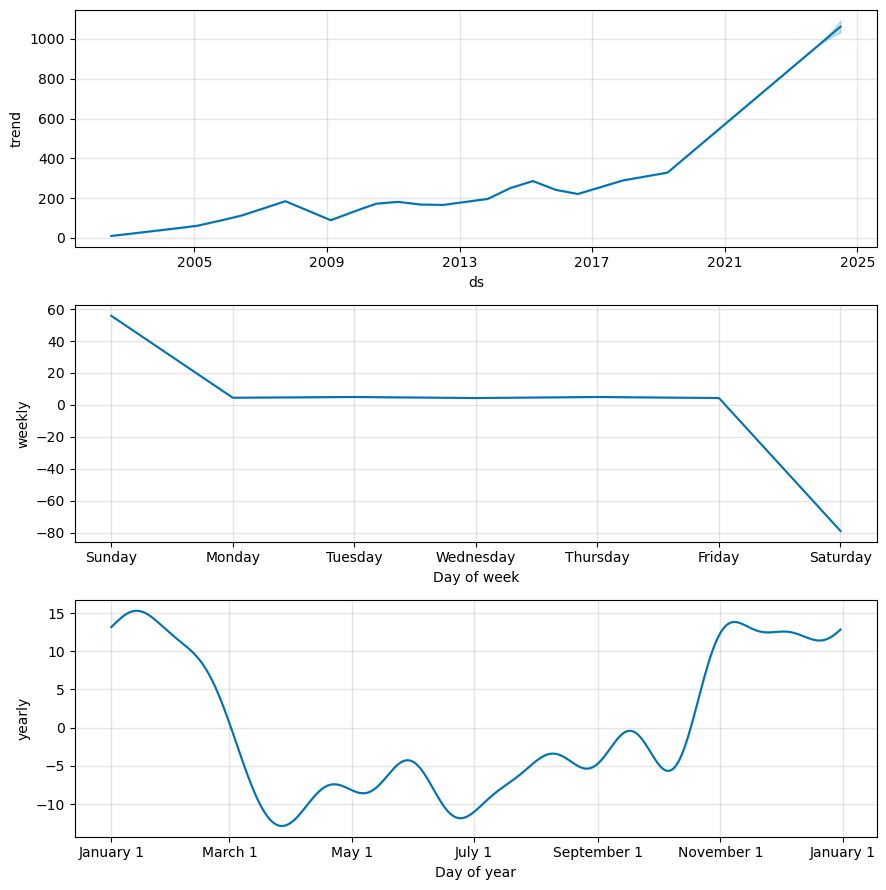

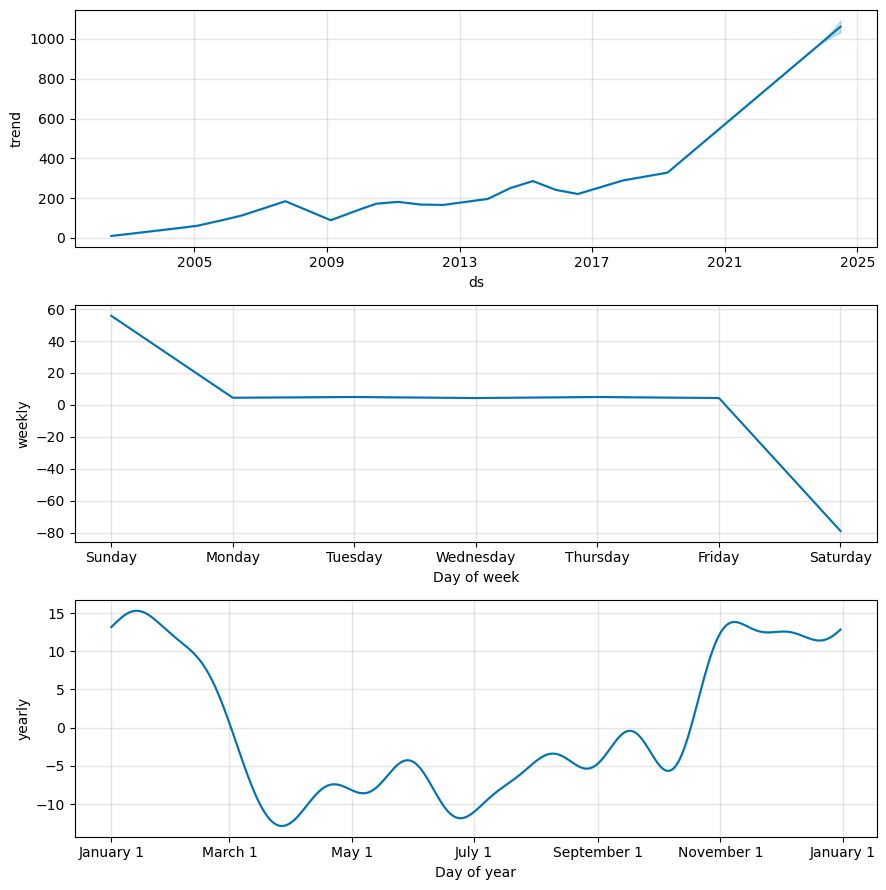

In [55]:
# Visualize each Components [Trends , Yearly]
model.plot_components(prediction)

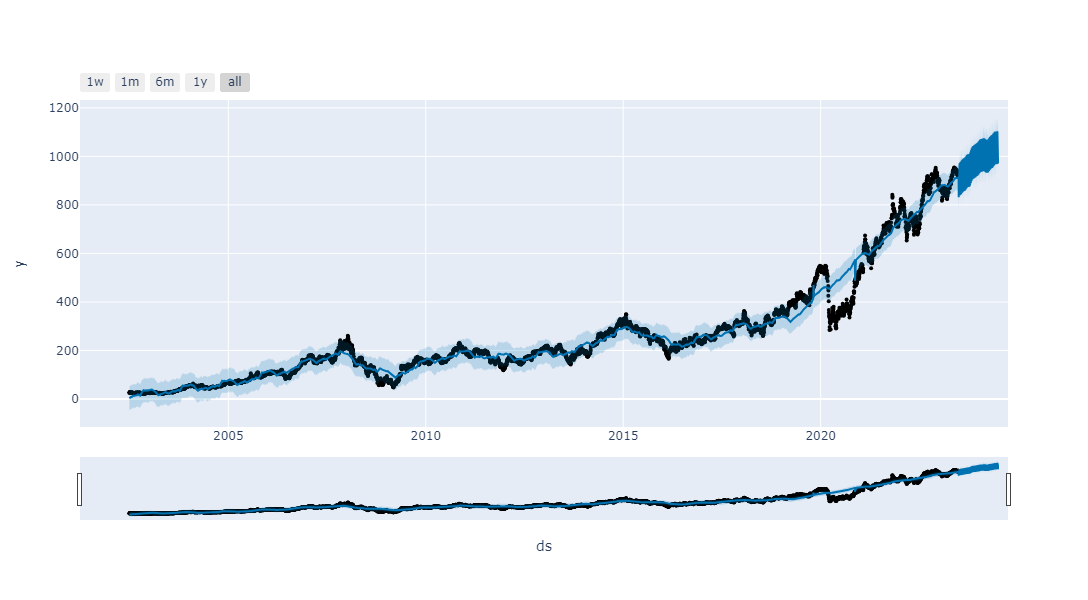

In [56]:
plot_plotly(model,prediction)

In [57]:
df_m

ds           y
0    2002-07-01   25.127272
1    2002-07-02   26.745455
2    2002-07-03   28.090908
3    2002-07-04   27.390909
4    2002-07-05   27.672728
...         ...         ...
5212 2023-06-23  923.500000
5213 2023-06-26  927.450012
5214 2023-06-27  936.099976
5215 2023-06-28  936.099976
5216 2023-06-30  934.599976

[5217 rows x 2 columns]

In [58]:
test=df[df['Date']>'2023-06-30']

In [59]:
test

Date       Close
5217 2023-07-03  942.549988
5218 2023-07-04  944.700012
5219 2023-07-05  958.000000
5220 2023-07-06  959.400024
5221 2023-07-07  946.400024
...         ...         ...
5284 2023-10-09  938.599976
5285 2023-10-10  951.200012
5286 2023-10-11  953.099976
5287 2023-10-12  954.250000
5288 2023-10-13  951.299988

[72 rows x 2 columns]

In [60]:
df2=prediction[['ds','yhat']]

In [61]:
df2.columns=['Date','yhat']

In [62]:
df2

Date         yhat
0    2002-07-01     3.276422
1    2002-07-02     4.020413
2    2002-07-03     3.639206
3    2002-07-04     4.593894
4    2002-07-05     4.231275
...         ...          ...
5577 2024-06-25  1053.258872
5578 2024-06-26  1053.040279
5579 2024-06-27  1054.185673
5580 2024-06-28  1054.041988
5581 2024-06-29   971.288170

[5582 rows x 2 columns]

In [63]:
test_predict=pd.merge(test, df2, on='Date')

In [64]:
test_predict

Date       Close        yhat
0  2023-07-03  942.549988  916.184989
1  2023-07-04  944.700012  917.282208
2  2023-07-05  958.000000  917.246930
3  2023-07-06  959.400024  918.540846
4  2023-07-07  946.400024  918.511503
..        ...         ...         ...
67 2023-10-09  938.599976  959.221712
68 2023-10-10  951.200012  960.362199
69 2023-10-11  953.099976  960.458846
70 2023-10-12  954.250000  961.975419
71 2023-10-13  951.299988  962.259363

[72 rows x 3 columns]

In [65]:
# Set 'Name' as the index of the dataframe
test_predict.set_index('Date', inplace=True)
test_predict

Close        yhat
Date                              
2023-07-03  942.549988  916.184989
2023-07-04  944.700012  917.282208
2023-07-05  958.000000  917.246930
2023-07-06  959.400024  918.540846
2023-07-07  946.400024  918.511503
...                ...         ...
2023-10-09  938.599976  959.221712
2023-10-10  951.200012  960.362199
2023-10-11  953.099976  960.458846
2023-10-12  954.250000  961.975419
2023-10-13  951.299988  962.259363

[72 rows x 2 columns]

<Axes: xlabel='Date'>

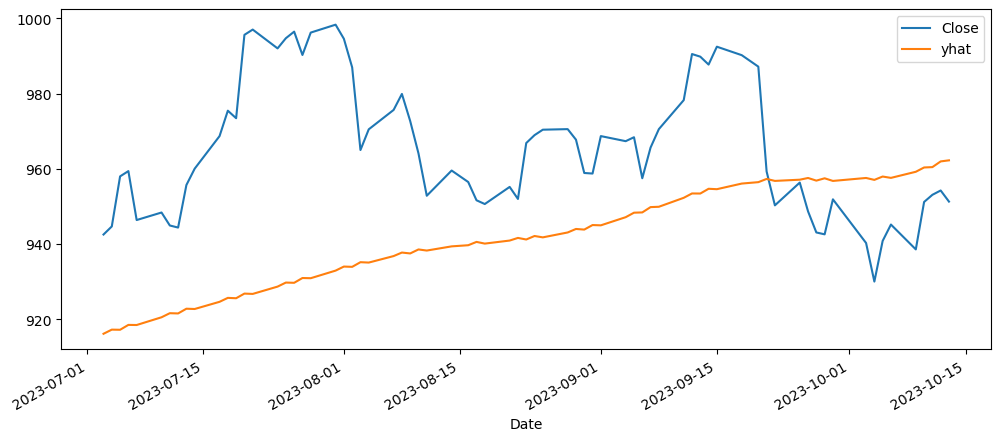

In [66]:
test_predict[['Close','yhat']].plot(figsize=(12,5))

In [67]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model, initial='730 days',period='180 days',horizon='365 days')
df_cv

  0%|          | 0/37 [00:00<?, ?it/s]

23:24:02 - cmdstanpy - INFO - Chain [1] start processing
23:24:02 - cmdstanpy - INFO - Chain [1] done processing
23:24:02 - cmdstanpy - INFO - Chain [1] start processing
23:24:02 - cmdstanpy - INFO - Chain [1] done processing
23:24:03 - cmdstanpy - INFO - Chain [1] start processing
23:24:03 - cmdstanpy - INFO - Chain [1] done processing
23:24:03 - cmdstanpy - INFO - Chain [1] start processing
23:24:03 - cmdstanpy - INFO - Chain [1] done processing
23:24:04 - cmdstanpy - INFO - Chain [1] start processing
23:24:04 - cmdstanpy - INFO - Chain [1] done processing
23:24:04 - cmdstanpy - INFO - Chain [1] start processing
23:24:04 - cmdstanpy - INFO - Chain [1] done processing
23:24:05 - cmdstanpy - INFO - Chain [1] start processing
23:24:05 - cmdstanpy - INFO - Chain [1] done processing
23:24:06 - cmdstanpy - INFO - Chain [1] start processing
23:24:06 - cmdstanpy - INFO - Chain [1] done processing
23:24:06 - cmdstanpy - INFO - Chain [1] start processing
23:24:06 - cmdstanpy - INFO - Chain [1]

ds        yhat  yhat_lower  yhat_upper           y     cutoff
0    2004-10-04   52.455820   50.164476   54.721018   52.990910 2004-10-02
1    2004-10-05   52.590673   50.356372   54.605489   54.181816 2004-10-02
2    2004-10-06   52.588050   50.282560   54.672788   53.790909 2004-10-02
3    2004-10-07   52.594881   50.424249   54.702331   53.572727 2004-10-02
4    2004-10-08   52.713560   50.558724   54.731142   53.881817 2004-10-02
...         ...         ...         ...         ...         ...        ...
9124 2023-06-23  836.476766  776.643420  900.659614  923.500000 2022-06-30
9125 2023-06-26  838.077401  780.099370  897.356421  927.450012 2022-06-30
9126 2023-06-27  838.641941  777.953625  901.188830  936.099976 2022-06-30
9127 2023-06-28  838.597378  779.559779  902.307283  936.099976 2022-06-30
9128 2023-06-30  839.288822  777.333792  902.865078  934.599976 2022-06-30

[9129 rows x 6 columns]

In [68]:
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

horizon          mse       rmse        mae      mape     mdape     smape  \
0 37 days  3425.785198  58.530208  43.183159  0.175291  0.135672  0.175619   
1 38 days  3464.535819  58.860308  43.449264  0.176849  0.137457  0.177490   
2 39 days  3497.964744  59.143594  43.645690  0.177791  0.137014  0.178286   
3 40 days  3538.070709  59.481684  43.774386  0.178283  0.136882  0.178826   
4 41 days  3584.481561  59.870540  44.122434  0.180355  0.138687  0.180560   

   coverage  
0  0.275000  
1  0.272368  
2  0.269315  
3  0.272387  
4  0.271974

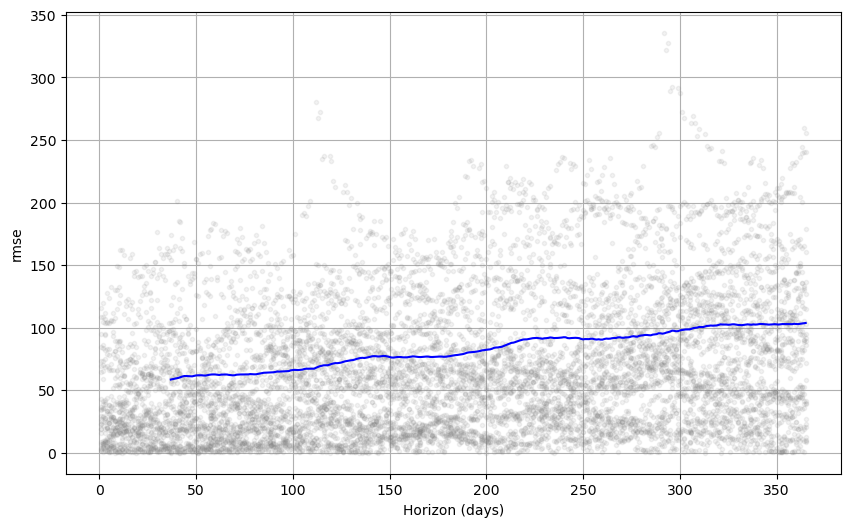

In [69]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

In [70]:
from statsmodels.tools.eval_measures import rmse

In [71]:
rmse(test_predict['Close'],test_predict['yhat'])

33.9478196276055

In [72]:
test_predict['Close'].mean()

965.3312522040474